In [2]:
# random forest regressor on 20m resolution images

import numpy as np
import pandas as pd
import sklearn
import math

In [3]:
df = pd.read_csv(r"./dataset-Icheon&CHL/2000_all_final_20221106.csv", low_memory = False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             322 non-null    int64  
 1   xcoord(long)   322 non-null    float64
 2   ycoord(lat)    322 non-null    float64
 3   sampling date  322 non-null    object 
 4   sensing date   322 non-null    object 
 5   B1             322 non-null    float64
 6   B2             322 non-null    float64
 7   B3             322 non-null    float64
 8   B4             322 non-null    float64
 9   B5             322 non-null    float64
 10  B6             322 non-null    float64
 11  B7             322 non-null    float64
 12  B8             322 non-null    float64
 13  B9             322 non-null    float64
 14  B10            322 non-null    float64
 15  B11            322 non-null    float64
 16  B12            322 non-null    float64
 17  NDVI           322 non-null    float64
 18  BSI       

In [5]:
df = pd.DataFrame(df[['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','B12','NDVI','BSI','EVI','AVI','SAVI','NDMI','SOC']])

In [6]:
df.head()

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,NDVI,BSI,EVI,AVI,SAVI,NDMI,SOC
0,0.10868,0.1528,0.2256,0.3088,0.35811,0.41561,0.42981,0.4520,0.45821,0.46119,0.45868,0.33458,0.188223,0.118547,0.219678,0.355000,0.172013,-0.007335,0.71
1,0.08210,0.0976,0.1448,0.2022,0.22249,0.27356,0.30689,0.3032,0.31966,0.31623,0.38970,0.28525,0.199842,0.192505,0.176813,0.290167,0.154519,-0.124838,0.71
2,0.05894,0.0667,0.1020,0.1478,0.18461,0.21207,0.23339,0.2519,0.23059,0.24656,0.31123,0.21316,0.260445,0.180587,0.183816,0.281670,0.179600,-0.105358,0.71
3,0.08430,0.0960,0.1420,0.1828,0.21946,0.25593,0.25838,0.2684,0.27970,0.28263,0.39233,0.29595,0.189716,0.224293,0.149339,0.265784,0.139032,-0.187565,0.71
4,0.09937,0.1232,0.1914,0.2514,0.24672,0.34012,0.36762,0.3731,0.39629,0.38758,0.44180,0.31169,0.194876,0.165532,0.199075,0.323933,0.165119,-0.084305,0.71


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
# # normalize1
# # band 값만 10000으로 나누기
# df['B2'] = df['B2']/10000
# df['B3'] = df['B3']/10000
# df['B4'] = df['B4']/10000
# df['B5'] = df['B5']/10000
# df['B6'] = df['B6']/10000
# df['B7'] = df['B7']/10000
# df['B8A'] = df['B8A']/10000
# df['B11'] = df['B11']/10000
# df['B12'] = df['B12']/10000


In [9]:
# df['AVI'] = df['AVI']/10000
# print(df)

In [10]:
x = df.iloc[:, :-1]
print(x)

          B1      B2      B3      B4       B5       B6       B7      B8  \
0    0.10868  0.1528  0.2256  0.3088  0.35811  0.41561  0.42981  0.4520   
1    0.08210  0.0976  0.1448  0.2022  0.22249  0.27356  0.30689  0.3032   
2    0.05894  0.0667  0.1020  0.1478  0.18461  0.21207  0.23339  0.2519   
3    0.08430  0.0960  0.1420  0.1828  0.21946  0.25593  0.25838  0.2684   
4    0.09937  0.1232  0.1914  0.2514  0.24672  0.34012  0.36762  0.3731   
..       ...     ...     ...     ...      ...      ...      ...     ...   
317  0.09826  0.1064  0.1526  0.1886  0.22043  0.24424  0.25659  0.2654   
318  0.09386  0.0866  0.1304  0.1842  0.20042  0.20899  0.22650  0.2578   
319  0.09607  0.0836  0.1152  0.1560  0.15445  0.21179  0.21498  0.2445   
320  0.07921  0.0598  0.0904  0.1182  0.12468  0.14167  0.15450  0.1451   
321  0.11120  0.0872  0.1248  0.1546  0.20452  0.21384  0.21965  0.2487   

          B9      B10      B11      B12      NDVI       BSI       EVI  \
0    0.45821  0.46119  0.4

In [11]:
y = df.iloc[:, -1:]

In [12]:
print(y)

      SOC
0    0.71
1    0.71
2    0.71
3    0.71
4    0.71
..    ...
317  3.30
318  2.51
319  2.51
320  2.51
321  2.51

[322 rows x 1 columns]


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.25)

In [14]:
##########모델 생성

model = RandomForestRegressor()

In [15]:
### Tree 최적화


In [16]:
##########모델 학습

model.fit(x_train, y_train.ravel())

RandomForestRegressor()

In [17]:
##########모델 검증
# R-squared

print(model.score(x_train, y_train)) #

print(model.score(x_test, y_test)) #

0.9170525397681053
0.5685443701601358


In [18]:
# R-squared

model.score(x.values,y.values)

0.7914683627769743

In [19]:
print(x.values.shape)
print(model.predict(x.values).shape)
print(y.values.shape)

(322, 18)
(322,)
(322, 1)


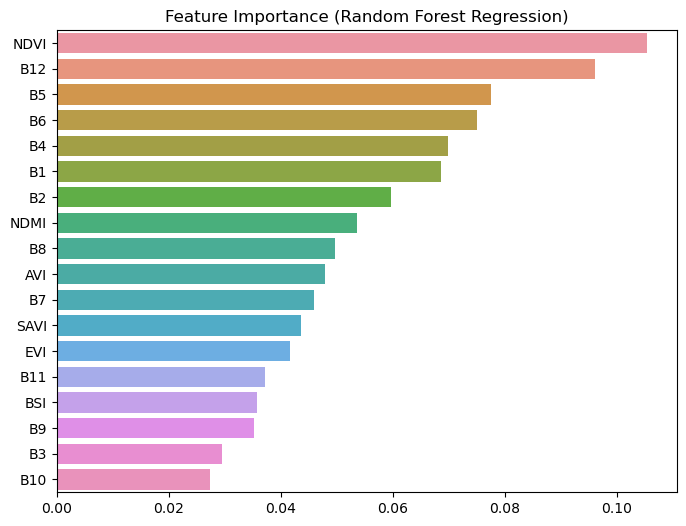

In [20]:
# feature importance

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.title("Feature Importance (Random Forest Regression)")
plt.show()

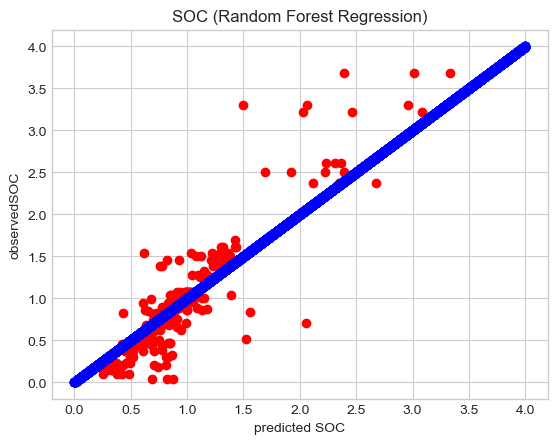

In [21]:
# Predicted versus observed SOC
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
X_grid = np.linspace(math.floor(min(model.predict(x.values))), math.ceil(max(model.predict(x.values))),10000)  # X의 최소값부터 X의 최대값까지 0.01 단위로 값 채우기
#X_grid = X_grid.reshape((len(X_grid),1))  # n X 1 행렬로 변환
plt.scatter(model.predict(x.values), y.values, color='red')
plt.scatter(X_grid,X_grid, color='blue')
plt.title('SOC (Random Forest Regression)')
plt.xlabel('predicted SOC')
plt.ylabel('observedSOC')
plt.show()